In [96]:
#Place script in any folder
import tensorflow as tf
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.backend import eager_learning_phase_scope
from tensorflow.python.keras.layers import GlobalMaxPooling2D
import numpy as np 
import logging, pickle, os 
#tf.get_logger().setLevel(logging.ERROR)
import matplotlib
from matplotlib import pyplot as plt
# model = load_model('model.h5')
model = load_model('./Emotion_Potato2.1hist.h5')
# model.add(GlobalMaxPooling2D())
inp = model.input                                         # input placeholder
all_layers=[layer for layer in model.layers]
print(len(all_layers))
for layer in model.layers:
    print(layer.output_shape)
model.summary()
# exit()
for layer_no in range(len(model.layers)):
    print(layer_no, model.layers[layer_no].__class__.__name__)
# exit()
out = [layer.output for layer in model.layers]            # all layer outputs
# get_outputs = K.function([inp, K.learning_phase()], out)  
fn = K.function([model.input], out)
class_labels = ['Angry','Happy','Neutral','Sad','Surprise']

img_rows,img_cols = 120,120

# arr = np.array([]) 
arr= np.empty(shape=[0, 261])
with open("top_1_correlations.pkl","rb") as f:
    top_1_correlations=pickle.load(f)
index=1
# plt.rcParams['figure.constrained_layout.use'] = True
fig = plt.figure()
fig.figsize=(200,250)

for file in os.scandir("./test_set_new"):
    path=file.path
    img = image.load_img(path, target_size=(img_rows,img_cols))

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255.
    with eager_learning_phase_scope(value=0):
        get_outputs = fn([x])
    first_layer_activation = get_outputs[27] 
    print(first_layer_activation.shape)
    #print(get_outputs[-1].shape)
    pred=np.argmax(get_outputs[-1])
    #print(file.name, class_labels[pred])
    #fig.figsize=(15,15)
    fig.add_subplot(10, 2,index) # 3 rows 2 colummns for 6 subfigs 
    # imgplot = plt.imshow(img)
    plt.imshow(img)
    plt.rcParams["figure.figsize"] = (50,30)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.title(class_labels[pred])
    #plt.figsize(5,5)
    plt.axis('off')
    # plt.savefig(file.name+'_fig.png', dpi=fig.dpi)
    neurons_dict=top_1_correlations[pred]
    index+=1
    for key in neurons_dict.keys():
        fig.add_subplot(10, 2, index) # 3 rows 2 colummns for 6 subfigs 
        plt.rcParams["figure.figsize"] = (20,10)
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.imshow(first_layer_activation[0, :, :, key], interpolation='nearest')
        
        plt.axis('off')
        index+=1
plt.tight_layout()

plt.savefig('big_fi1.png', dpi=fig.dpi)


OSError: SavedModel file does not exist at: ./Emotion_Potato2.1hist.h5/{saved_model.pbtxt|saved_model.pb}

0 Conv2D
1 Activation
2 BatchNormalization
3 Conv2D
4 Activation
5 BatchNormalization
6 MaxPooling2D
7 Dropout
8 Conv2D
9 Activation
10 BatchNormalization
11 Conv2D
12 Activation
13 BatchNormalization
14 MaxPooling2D
15 Dropout
16 Conv2D
17 Activation
18 BatchNormalization
19 Conv2D
20 Activation
21 BatchNormalization
22 MaxPooling2D
23 Dropout
24 Conv2D
25 Activation
26 BatchNormalization
27 Conv2D
28 Activation
29 BatchNormalization
30 MaxPooling2D
31 Dropout
32 Flatten
33 Dense
34 Activation
35 BatchNormalization
36 Dropout
37 Dense
38 Activation
39 BatchNormalization
40 Dropout
41 Dense
42 Activation
256
1212.jpg
1583256595552.jpg
1583257063276.jpg
17016.jpg
180.jpg
23977.jpg
582.jpg
6795.jpg
723.jpg
784.jpg
(10, 261)



Doing correelations



(1, 15, 15, 256)
(1, 15, 15, 256)
(1, 15, 15, 256)
(1, 15, 15, 256)
(1, 15, 15, 256)


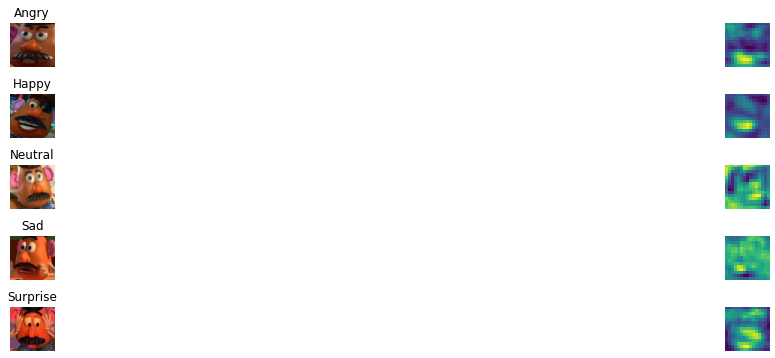

In [54]:
#Place script in any folder
import tensorflow as tf
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.backend import eager_learning_phase_scope
from tensorflow.python.keras.layers import GlobalMaxPooling2D
import numpy as np 
import logging, pickle, os 
tf.get_logger().setLevel(logging.ERROR)
model = load_model('./Emotion_Potato2.1hist.h5')
inp = model.input                                         # input placeholder
all_layers=[layer for layer in model.layers]
for layer_no in range(len(model.layers)):
    print(layer_no, model.layers[layer_no].__class__.__name__)
###################################################################################################
#use last max pooling layer number here
last_max_pooling_layer=30
last_convolution_layer=27
# print(layer, model.layers[layer].__class__.__name__)
out = [layer.output for layer in model.layers]            # all layer outputs
# get_outputs = K.function([inp, K.learning_phase()], out)  
fn = K.function([model.input], out)

img_rows,img_cols = 120,120
print(model.layers[last_max_pooling_layer].output_shape[3])
max_pool_shape=model.layers[last_max_pooling_layer].output_shape[3]
arr= np.empty(shape=[0, max_pool_shape+5])
# arr = np.array([]) 
#arr= np.empty(shape=[0, 261])
for x in os.scandir("./testset"):
    path=x.path
    img = image.load_img(path, target_size=(img_rows,img_cols))
    print(x.name)

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255.
    with eager_learning_phase_scope(value=0):
        get_outputs = fn([x])
    temp=(get_outputs[last_max_pooling_layer])
    # print(temp.shape)
    y = tf.keras.layers.GlobalMaxPool2D()(temp)
    final_output=get_outputs[-1]
    # print("Final output hsape: ",final_output.shape)
    # print("after concatenation")
    correlation_array=np.hstack([y ,final_output])
    arr=np.vstack([arr, correlation_array])
    #print(correlation_array.shape)
    #print(correlation_array)
 
# with open("corr_arr.pkl","wb") as f:
    # pickle.dump(arr,f)

import pickle
import numpy as np
from operator import itemgetter

#with open("corr_arr.pkl","rb") as f:
  #  arr=pickle.load(f)
print(arr.shape)
# arrayA = [ .1, .2, .4 ]
# arrayB = [ .3, .1, .3 ]
# print(( np.asarray(arrayA).shape, arrayB ))
# print(np.corrcoef( arrayA, arrayB ))#[0,1] #see Homework bellow why we are using just one cell
# print(arr[:,1   ])
print("\n\n\nDoing correelations\n\n\n")
# correlations_dict={}
main_dict={}
for i in range(5):
    temp_class_dict={}
    for j in range(max_pool_shape):
        current_corr=np.corrcoef(arr[:,j],arr[:,j+i+1])[0,1]
        # correlations_dict["variable_"+str(j)+" vs class_"+str(i)]=current_corr
        temp_class_dict[j]=current_corr
    main_dict[i]=(dict(sorted(temp_class_dict.items(), key = itemgetter(1), reverse = True)[:1]))
    # print("biggest correlation for class ",i)
    # print((dict(sorted(temp_class_dict.items(), key = itemgetter(1), reverse = True)[:1])))
# print("top 20 overall correlations are")
# print(dict(sorted(correlations_dict.items(), key = itemgetter(1), reverse = True)[:20]))
# with open("top_1_correlations.pkl","wb") as f:
    # pickle.dump(main_dict,f
    
#!/usr/bin/env python
# coding: utf-8

# In[24]:


#Place script in any folder
import tensorflow as tf
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.backend import eager_learning_phase_scope
from tensorflow.python.keras.layers import GlobalMaxPooling2D
import numpy as np 
import logging, pickle, os 
#tf.get_logger().setLevel(logging.ERROR)
import matplotlib
from matplotlib import pyplot as plt
# model = load_model('model.h5')
class_labels = ['Angry','Happy','Neutral','Sad','Surprise']

img_rows,img_cols = 120,120

# arr = np.array([]) 
arr= np.empty(shape=[0, max_pool_shape+5])
# with open("top_1_correlations.pkl","rb") as f:
    # top_1_correlations=pickle.load(f)
top_1_correlations=main_dict
index=1
# plt.rcParams['figure.constrained_layout.use'] = True
fig = plt.figure()
fig.figsize=(200,250)

for file in os.scandir("./test_set_new"):
    path=file.path
    img = image.load_img(path, target_size=(img_rows,img_cols))

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255.
    with eager_learning_phase_scope(value=0):
        get_outputs = fn([x])
    first_layer_activation = get_outputs[last_convolution_layer] 
    print(first_layer_activation.shape)
    #print(get_outputs[-1].shape)
    pred=np.argmax(get_outputs[-1])
    #print(file.name, class_labels[pred])
    #fig.figsize=(15,15)
    fig.add_subplot(10, 2,index) # 3 rows 2 colummns for 6 subfigs 
    # imgplot = plt.imshow(img)
    plt.imshow(img)
    plt.rcParams["figure.figsize"] = (50,30)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.title(class_labels[pred])
    #plt.figsize(5,5)
    plt.axis('off')
    # plt.savefig(file.name+'_fig.png', dpi=fig.dpi)
    neurons_dict=top_1_correlations[pred]
    index+=1
    for key in neurons_dict.keys():
        fig.add_subplot(10, 2, index) # 3 rows 2 colummns for 6 subfigs 
        plt.rcParams["figure.figsize"] = (20,10)
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.imshow(first_layer_activation[0, :, :, key], interpolation='nearest')
        
        plt.axis('off')
        index+=1
plt.tight_layout()

plt.savefig('big_fi1.png', dpi=fig.dpi)


# In[ ]:







In [97]:
#Place script in any folder
import tensorflow as tf
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.backend import eager_learning_phase_scope
from tensorflow.python.keras.layers import GlobalMaxPooling2D
import numpy as np 
import logging, pickle, os 
tf.get_logger().setLevel(logging.ERROR)
model = load_model('./Copy of Emotion_Potato1hist.h5')
inp = model.input                                         # input placeholder
all_layers=[layer for layer in model.layers]
for layer_no in range(len(model.layers)):
    print(layer_no, model.layers[layer_no].__class__.__name__)
###################################################################################################
#use last max pooling layer number here
last_max_pooling_layer=5
last_convolution_layer=4
# print(layer, model.layers[layer].__class__.__name__)
out = [layer.output for layer in model.layers]            # all layer outputs
# get_outputs = K.function([inp, K.learning_phase()], out)  
fn = K.function([model.input], out)

img_rows,img_cols = 120,120
print(model.layers[last_max_pooling_layer].output_shape[3])
max_pool_shape=model.layers[last_max_pooling_layer].output_shape[3]
arr= np.empty(shape=[0, max_pool_shape+5])
# arr = np.array([]) 
#arr= np.empty(shape=[0, 261])
for x in os.scandir("./testset"):
    path=x.path
    img = image.load_img(path, target_size=(img_rows,img_cols))
    print(x.name)

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255.
    with eager_learning_phase_scope(value=0):
        get_outputs = fn([x])
    temp=(get_outputs[last_max_pooling_layer])
    # print(temp.shape)
    y = tf.keras.layers.GlobalMaxPool2D()(temp)
    final_output=get_outputs[-1]
    # print("Final output hsape: ",final_output.shape)
    # print("after concatenation")
    correlation_array=np.hstack([y ,final_output])
    arr=np.vstack([arr, correlation_array])
    #print(correlation_array.shape)
    #print(correlation_array)
 
# with open("corr_arr.pkl","wb") as f:
    # pickle.dump(arr,f)

import pickle
import numpy as np
from operator import itemgetter

#with open("corr_arr.pkl","rb") as f:
  #  arr=pickle.load(f)
print(arr.shape)
# arrayA = [ .1, .2, .4 ]
# arrayB = [ .3, .1, .3 ]
# print(( np.asarray(arrayA).shape, arrayB ))
# print(np.corrcoef( arrayA, arrayB ))#[0,1] #see Homework bellow why we are using just one cell
# print(arr[:,1   ])
print("\n\n\nDoing correelations\n\n\n")
# correlations_dict={}
main_dict={}
for i in range(5):
    temp_class_dict={}
    for j in range(max_pool_shape):
        current_corr=np.corrcoef(arr[:,j],arr[:,j+i+1])[0,1]
        # correlations_dict["variable_"+str(j)+" vs class_"+str(i)]=current_corr
        temp_class_dict[j]=current_corr
    main_dict[i]=(dict(sorted(temp_class_dict.items(), key = itemgetter(1), reverse = True)[:1]))
    # print("biggest correlation for class ",i)
    # print((dict(sorted(temp_class_dict.items(), key = itemgetter(1), reverse = True)[:1])))
# print("top 20 overall correlations are")
# print(dict(sorted(correlations_dict.items(), key = itemgetter(1), reverse = True)[:20]))
# with open("top_1_correlations.pkl","wb") as f:
    # pickle.dump(main_dict,f
    
#!/usr/bin/env python
# coding: utf-8

# In[24]:


#Place script in any folder
import tensorflow as tf
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.backend import eager_learning_phase_scope
from tensorflow.python.keras.layers import GlobalMaxPooling2D
import numpy as np 
import logging, pickle, os 
#tf.get_logger().setLevel(logging.ERROR)
import matplotlib
from matplotlib import pyplot as plt
# model = load_model('model.h5')
class_labels = ['Angry','Happy','Neutral','Sad','Surprise']

img_rows,img_cols = 120,120

# arr = np.array([]) 
arr= np.empty(shape=[0, max_pool_shape+5])
# with open("top_1_correlations.pkl","rb") as f:
    # top_1_correlations=pickle.load(f)
top_1_correlations=main_dict
index=1
# plt.rcParams['figure.constrained_layout.use'] = True
fig = plt.figure()
fig.figsize=(200,250)

for file in os.scandir("./test_set_new"):
    path=file.path
    img = image.load_img(path, target_size=(img_rows,img_cols))

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255.
    with eager_learning_phase_scope(value=0):
        get_outputs = fn([x])
    first_layer_activation = get_outputs[last_convolution_layer] 
    print(first_layer_activation.shape)
    #print(get_outputs[-1].shape)
    pred=np.argmax(get_outputs[-1])
    #print(file.name, class_labels[pred])
    #fig.figsize=(15,15)
    fig.add_subplot(10, 2,index) # 3 rows 2 colummns for 6 subfigs 
    # imgplot = plt.imshow(img)
    plt.imshow(img)
    plt.rcParams["figure.figsize"] = (50,30)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.title(class_labels[pred])
    #plt.figsize(5,5)
    plt.axis('off')
    # plt.savefig(file.name+'_fig.png', dpi=fig.dpi)
    neurons_dict=top_1_correlations[pred]
    index+=1
    for key in neurons_dict.keys():
        fig.add_subplot(10, 2, index) # 3 rows 2 colummns for 6 subfigs 
        plt.rcParams["figure.figsize"] = (20,10)
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.imshow(first_layer_activation[0, :, :, key], interpolation='nearest')
        
        plt.axis('off')
        index+=1
plt.tight_layout()

plt.savefig('big_fi1.png', dpi=fig.dpi)


# In[ ]:







OSError: SavedModel file does not exist at: ./Copy of Emotion_Potato1hist.h5/{saved_model.pbtxt|saved_model.pb}

In [ ]:
#New Testing Code 

In [94]:
#Place script in any folder
import tensorflow as tf
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.backend import eager_learning_phase_scope
from tensorflow.python.keras.layers import GlobalMaxPooling2D
import numpy as np 
import logging, pickle, os 
tf.get_logger().setLevel(logging.ERROR)
model = load_model('./Copy of Trail_Emotion_Potato2.2hist.h5')
inp = model.input                                         # input placeholder
all_layers=[layer for layer in model.layers]
for layer_no in range(len(model.layers)):
    print(layer_no, model.layers[layer_no].__class__.__name__)
###################################################################################################
#use last max pooling layer number here
last_max_pooling_layer=8
last_convolution_layer=6
# print(layer, model.layers[layer].__class__.__name__)
out = [layer.output for layer in model.layers]            # all layer outputs
# get_outputs = K.function([inp, K.learning_phase()], out)  
fn = K.function([model.input], out)

img_rows,img_cols = 120,120
#print(model.layers[last_max_pooling_layer].output_shape[3])
max_pool_shape=model.layers[last_max_pooling_layer].output_shape[3]
arr= np.empty(shape=[0, max_pool_shape+5])
# arr = np.array([]) 
#arr= np.empty(shape=[0, 261])
for x in os.scandir("./findtest"):
    path=x.path
    img = image.load_img(path, target_size=(img_rows,img_cols))
    #print(x.name)

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255.
    with eager_learning_phase_scope(value=0):
        get_outputs = fn([x])
    temp=(get_outputs[last_max_pooling_layer])
    # print(temp.shape)
    y = tf.keras.layers.GlobalMaxPool2D()(temp)
    final_output=get_outputs[-1]
    # print("Final output hsape: ",final_output.shape)
    # print("after concatenation")
    correlation_array=np.hstack([y ,final_output])
    arr=np.vstack([arr, correlation_array])
    #print(correlation_array.shape)
    #print(correlation_array)
 
# with open("corr_arr.pkl","wb") as f:
    # pickle.dump(arr,f)

import pickle
import numpy as np
from operator import itemgetter

#with open("corr_arr.pkl","rb") as f:
  #  arr=pickle.load(f)
#print(arr.shape)
# arrayA = [ .1, .2, .4 ]
# arrayB = [ .3, .1, .3 ]
# print(( np.asarray(arrayA).shape, arrayB ))
# print(np.corrcoef( arrayA, arrayB ))#[0,1] #see Homework bellow why we are using just one cell
# print(arr[:,1   ])
#print("\n\n\nDoing correelations\n\n\n")
# correlations_dict={}
main_dict={}
for i in range(5):
    temp_class_dict={}
    for j in range(max_pool_shape):
        current_corr=np.corrcoef(arr[:,j],arr[:,j+i+1])[0,1]
        # correlations_dict["variable_"+str(j)+" vs class_"+str(i)]=current_corr
        temp_class_dict[j]=current_corr
    main_dict[i]=(dict(sorted(temp_class_dict.items(), key = itemgetter(1), reverse = True)[:1]))
    # print("biggest correlation for class ",i)
    # print((dict(sorted(temp_class_dict.items(), key = itemgetter(1), reverse = True)[:1])))
# print("top 20 overall correlations are")
# print(dict(sorted(correlations_dict.items(), key = itemgetter(1), reverse = True)[:20]))
# with open("top_1_correlations.pkl","wb") as f:
    # pickle.dump(main_dict,f
    
#!/usr/bin/env python
# coding: utf-8

# In[24]:


#Place script in any folder
import tensorflow as tf
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.backend import eager_learning_phase_scope
from tensorflow.python.keras.layers import GlobalMaxPooling2D
import numpy as np 
import logging, pickle, os 
#tf.get_logger().setLevel(logging.ERROR)
import matplotlib
from matplotlib import pyplot as plt
# model = load_model('model.h5')
class_labels = ['Angry','Happy','Neutral','Sad','Surprise']

img_rows,img_cols = 120,120

# arr = np.array([]) 
arr= np.empty(shape=[0, max_pool_shape+5])
# with open("top_1_correlations.pkl","rb") as f:
    # top_1_correlations=pickle.load(f)
top_1_correlations=main_dict
index=1
# plt.rcParams['figure.constrained_layout.use'] = True
fig = plt.figure()
fig.figsize=(200,250)

for file in os.scandir("./test_set_new"):
    path=file.path
    img = image.load_img(path, target_size=(img_rows,img_cols))

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255.
    with eager_learning_phase_scope(value=0):
        get_outputs = fn([x])
    first_layer_activation = get_outputs[last_convolution_layer] 
    #print(first_layer_activation.shape)
    #print(get_outputs[-1].shape)
    pred=np.argmax(get_outputs[-1])
    print(file.name, class_labels[pred])



# In[ ]:







OSError: SavedModel file does not exist at: ./Copy of Trail_Emotion_Potato2.2hist.h5/{saved_model.pbtxt|saved_model.pb}

In [ ]:
    #fig.figsize=(15,15)
    fig.add_subplot(10, 2,index) # 3 rows 2 colummns for 6 subfigs 
    # imgplot = plt.imshow(img)
    plt.imshow(img)
    plt.rcParams["figure.figsize"] = (50,30)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.title(class_labels[pred])
    #plt.figsize(5,5)
    plt.axis('off')
    # plt.savefig(file.name+'_fig.png', dpi=fig.dpi)
    neurons_dict=top_1_correlations[pred]
    index+=1
    for key in neurons_dict.keys():
        fig.add_subplot(10, 2, index) # 3 rows 2 colummns for 6 subfigs 
        plt.rcParams["figure.figsize"] = (20,10)
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.imshow(first_layer_activation[0, :, :, key], interpolation='nearest')
        
        plt.axis('off')
        index+=1
plt.tight_layout()

plt.savefig('big_fi1.png', dpi=fig.dpi)

In [92]:
import os
 
'''
 
 Function: renameFiles
 Parameters: 
    @path: The path to the folder you want to traverse
    @depth: How deep you want to traverse the folder. Defaults to 99 levels. 
 
'''
path = "./MobileNet/Potato Head Results/train"
 
def renameFiles(path,  depth=99):
    # Once we hit depth, return
    if depth < 0: return
 
    # Make sure that a path was supplied and it is not a symbolic link
    if os.path.isdir(path) and not os.path.islink(path):
     # We will use a counter to append to the end of the file name
     ind = 1
 
     # Loop through each file in the start directory and create a fullpath
     for file in os.listdir(path):
       fullpath = path + os.path.sep + file
 
       # Again we don't want to follow symbolic links
       if not os.path.islink(fullpath):
 
         # If it is a directory, recursively call this function 
         # giving that path and reducing the depth.
         if os.path.isdir(fullpath):
           renameFiles(fullpath, depth - 1)
         else:
           # Find the extension (if available) and rebuild file name 
           # using the directory, new base filename, index and the old extension.
           extension = os.path.splitext(fullpath)[1]
 
           # We are only interested in changing names of images. 
           # So if there is a non-image file in there, we want to ignore it
           if extension in ('.jpg','.jpeg','.png','.gif'):
 
             # We want to make sure that we change the directory we are in
             # If you do not do this, you will not get to the subdirectory names
             os.chdir(path)
 
             # Lets get the full path of the files in question
             dir_path =  os.path.basename(os.path.dirname(os.path.realpath(file)))
 
             # We then define the name of the new path in order
             # The full path, then a dash, then 2 digits, then the extension
             newpath = os.path.dirname(fullpath) + os.path.sep   + dir_path \
             + ' - '+"{0:0=2d}".format(ind) + extension
 
             # If a file exists in the new path we defined, we probably do not want
             # to over write it. So we will redefine the new path until we get a unique name
             while os.path.exists(newpath):
                ind +=1
                newpath = os.path.dirname(fullpath) + os.path.sep   + dir_path \
                + ' - '+"{0:0=2d}".format(ind) + extension
 
             # We rename the file and increment the sequence by one. 
             os.rename(fullpath, newpath)
             ind += 1
    return
 
renameFiles(os.getcwd())

0 InputLayer
1 Conv2D
2 Conv2D
3 MaxPooling2D
4 Conv2D
5 Conv2D
6 MaxPooling2D
7 Conv2D
8 Conv2D
9 Conv2D
10 MaxPooling2D
11 Conv2D
12 Conv2D
13 Conv2D
14 MaxPooling2D
15 Conv2D
16 Conv2D
17 Conv2D
18 MaxPooling2D
19 Flatten
20 Dense
512
1212.jpg
1583256595552.jpg
1583257063276.jpg
17016.jpg
180.jpg
23977.jpg
582.jpg
6795.jpg
723.jpg
784.jpg
(10, 517)



Doing correelations



(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)


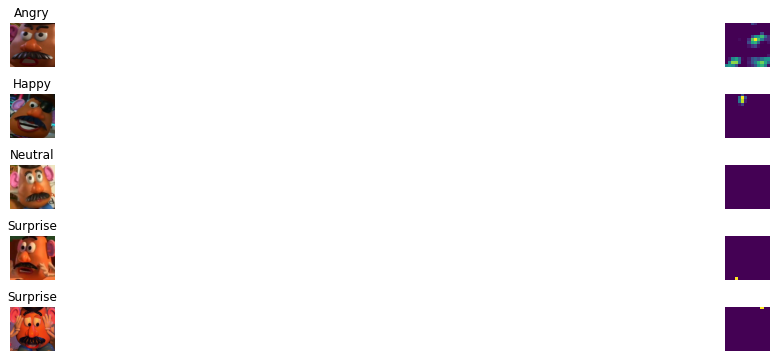

In [64]:
#Place script in any folder
import tensorflow as tf
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.backend import eager_learning_phase_scope
from tensorflow.python.keras.layers import GlobalMaxPooling2D
import numpy as np 
import logging, pickle, os 
tf.get_logger().setLevel(logging.ERROR)
model = load_model('./Copy of VGG16_new_model.h5')
inp = model.input                                         # input placeholder
all_layers=[layer for layer in model.layers]
for layer_no in range(len(model.layers)):
    print(layer_no, model.layers[layer_no].__class__.__name__)
###################################################################################################
#use last max pooling layer number here
last_max_pooling_layer=18
last_convolution_layer=17
# print(layer, model.layers[layer].__class__.__name__)
out = [layer.output for layer in model.layers]            # all layer outputs
# get_outputs = K.function([inp, K.learning_phase()], out)  
fn = K.function([model.input], out)

img_rows,img_cols = 224,224
print(model.layers[last_max_pooling_layer].output_shape[3])
max_pool_shape=model.layers[last_max_pooling_layer].output_shape[3]
arr= np.empty(shape=[0, max_pool_shape+5])
# arr = np.array([]) 
#arr= np.empty(shape=[0, 261])
for x in os.scandir("./testset"):
    path=x.path
    img = image.load_img(path, target_size=(img_rows,img_cols))
    print(x.name)

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255.
    with eager_learning_phase_scope(value=0):
        get_outputs = fn([x])
    temp=(get_outputs[last_max_pooling_layer])
    # print(temp.shape)
    y = tf.keras.layers.GlobalMaxPool2D()(temp)
    final_output=get_outputs[-1]
    # print("Final output hsape: ",final_output.shape)
    # print("after concatenation")
    correlation_array=np.hstack([y ,final_output])
    arr=np.vstack([arr, correlation_array])
    #print(correlation_array.shape)
    #print(correlation_array)
 
# with open("corr_arr.pkl","wb") as f:
    # pickle.dump(arr,f)

import pickle
import numpy as np
from operator import itemgetter

#with open("corr_arr.pkl","rb") as f:
  #  arr=pickle.load(f)
print(arr.shape)
# arrayA = [ .1, .2, .4 ]
# arrayB = [ .3, .1, .3 ]
# print(( np.asarray(arrayA).shape, arrayB ))
# print(np.corrcoef( arrayA, arrayB ))#[0,1] #see Homework bellow why we are using just one cell
# print(arr[:,1   ])
print("\n\n\nDoing correelations\n\n\n")
# correlations_dict={}
main_dict={}
for i in range(5):
    temp_class_dict={}
    for j in range(max_pool_shape):
        current_corr=np.corrcoef(arr[:,j],arr[:,j+i+1])[0,1]
        # correlations_dict["variable_"+str(j)+" vs class_"+str(i)]=current_corr
        temp_class_dict[j]=current_corr
    main_dict[i]=(dict(sorted(temp_class_dict.items(), key = itemgetter(1), reverse = True)[:1]))
    # print("biggest correlation for class ",i)
    # print((dict(sorted(temp_class_dict.items(), key = itemgetter(1), reverse = True)[:1])))
# print("top 20 overall correlations are")
# print(dict(sorted(correlations_dict.items(), key = itemgetter(1), reverse = True)[:20]))
# with open("top_1_correlations.pkl","wb") as f:
    # pickle.dump(main_dict,f
    
#!/usr/bin/env python
# coding: utf-8

# In[24]:


#Place script in any folder
import tensorflow as tf
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.backend import eager_learning_phase_scope
from tensorflow.python.keras.layers import GlobalMaxPooling2D
import numpy as np 
import logging, pickle, os 
#tf.get_logger().setLevel(logging.ERROR)
import matplotlib
from matplotlib import pyplot as plt
# model = load_model('model.h5')
class_labels = ['Angry','Happy','Neutral','Sad','Surprise']

img_rows,img_cols = 224,224

# arr = np.array([]) 
arr= np.empty(shape=[0, max_pool_shape+5])
# with open("top_1_correlations.pkl","rb") as f:
    # top_1_correlations=pickle.load(f)
top_1_correlations=main_dict
index=1
# plt.rcParams['figure.constrained_layout.use'] = True
fig = plt.figure()
fig.figsize=(200,250)

for file in os.scandir("./test_set_new"):
    path=file.path
    img = image.load_img(path, target_size=(img_rows,img_cols))

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255.
    with eager_learning_phase_scope(value=0):
        get_outputs = fn([x])
    first_layer_activation = get_outputs[last_convolution_layer] 
    print(first_layer_activation.shape)
    #print(get_outputs[-1].shape)
    pred=np.argmax(get_outputs[-1])
    #print(file.name, class_labels[pred])
    #fig.figsize=(15,15)
    fig.add_subplot(10, 2,index) # 3 rows 2 colummns for 6 subfigs 
    # imgplot = plt.imshow(img)
    plt.imshow(img)
    plt.rcParams["figure.figsize"] = (50,30)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.title(class_labels[pred])
    #plt.figsize(5,5)
    plt.axis('off')
    # plt.savefig(file.name+'_fig.png', dpi=fig.dpi)
    neurons_dict=top_1_correlations[pred]
    index+=1
    for key in neurons_dict.keys():
        fig.add_subplot(10, 2, index) # 3 rows 2 colummns for 6 subfigs 
        plt.rcParams["figure.figsize"] = (20,10)
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.imshow(first_layer_activation[0, :, :, key], interpolation='nearest')
        
        plt.axis('off')
        index+=1
plt.tight_layout()

plt.savefig('big_fi1.png', dpi=fig.dpi)


# In[ ]:







1024
1212.jpg
1583256595552.jpg
1583257063276.jpg
17016.jpg
180.jpg
23977.jpg
582.jpg
6795.jpg
723.jpg
784.jpg
(10, 1029)



Doing correelations



(1, 7, 7, 1024)
(1, 7, 7, 1024)
(1, 7, 7, 1024)
(1, 7, 7, 1024)
(1, 7, 7, 1024)


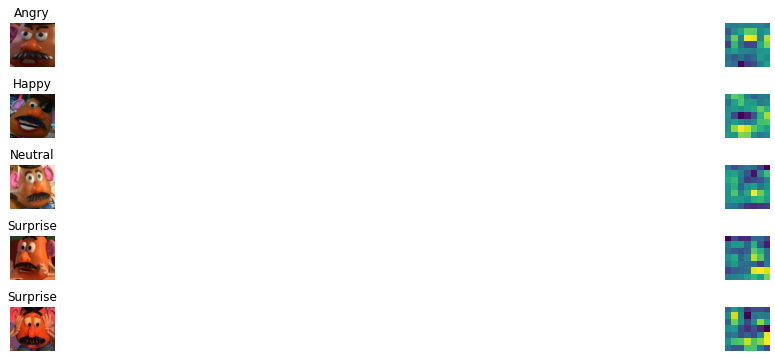

In [67]:



#Place script in any folder
import tensorflow as tf
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.backend import eager_learning_phase_scope
from tensorflow.python.keras.layers import GlobalMaxPooling2D
import numpy as np 
import logging, pickle, os 
tf.get_logger().setLevel(logging.ERROR)
model = load_model('./Copy of xceptionModel.h5')
inp = model.input                                         # input placeholder
all_layers=[layer for layer in model.layers]
#for layer_no in range(len(model.layers)):
#    print(layer_no, model.layers[layer_no].__class__.__name__)
###################################################################################################
#use last max pooling layer number here
last_max_pooling_layer=123
last_convolution_layer=122
# print(layer, model.layers[layer].__class__.__name__)
out = [layer.output for layer in model.layers]            # all layer outputs
# get_outputs = K.function([inp, K.learning_phase()], out)  
fn = K.function([model.input], out)

img_rows,img_cols = 224,224
print(model.layers[last_max_pooling_layer].output_shape[3])
max_pool_shape=model.layers[last_max_pooling_layer].output_shape[3]
arr= np.empty(shape=[0, max_pool_shape+5])
# arr = np.array([]) 
#arr= np.empty(shape=[0, 261])
for x in os.scandir("./testset"):
    path=x.path
    img = image.load_img(path, target_size=(img_rows,img_cols))
    print(x.name)

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255.
    with eager_learning_phase_scope(value=0):
        get_outputs = fn([x])
    temp=(get_outputs[last_max_pooling_layer])
    # print(temp.shape)
    y = tf.keras.layers.GlobalMaxPool2D()(temp)
    final_output=get_outputs[-1]
    # print("Final output hsape: ",final_output.shape)
    # print("after concatenation")
    correlation_array=np.hstack([y ,final_output])
    arr=np.vstack([arr, correlation_array])
    #print(correlation_array.shape)
    #print(correlation_array)
 
# with open("corr_arr.pkl","wb") as f:
    # pickle.dump(arr,f)

import pickle
import numpy as np
from operator import itemgetter

#with open("corr_arr.pkl","rb") as f:
  #  arr=pickle.load(f)
print(arr.shape)
# arrayA = [ .1, .2, .4 ]
# arrayB = [ .3, .1, .3 ]
# print(( np.asarray(arrayA).shape, arrayB ))
# print(np.corrcoef( arrayA, arrayB ))#[0,1] #see Homework bellow why we are using just one cell
# print(arr[:,1   ])
print("\n\n\nDoing correelations\n\n\n")
# correlations_dict={}
main_dict={}
for i in range(5):
    temp_class_dict={}
    for j in range(max_pool_shape):
        current_corr=np.corrcoef(arr[:,j],arr[:,j+i+1])[0,1]
        # correlations_dict["variable_"+str(j)+" vs class_"+str(i)]=current_corr
        temp_class_dict[j]=current_corr
    main_dict[i]=(dict(sorted(temp_class_dict.items(), key = itemgetter(1), reverse = True)[:1]))
    # print("biggest correlation for class ",i)
    # print((dict(sorted(temp_class_dict.items(), key = itemgetter(1), reverse = True)[:1])))
# print("top 20 overall correlations are")
# print(dict(sorted(correlations_dict.items(), key = itemgetter(1), reverse = True)[:20]))
# with open("top_1_correlations.pkl","wb") as f:
    # pickle.dump(main_dict,f
    
#!/usr/bin/env python
# coding: utf-8

# In[24]:


#Place script in any folder
import tensorflow as tf
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.backend import eager_learning_phase_scope
from tensorflow.python.keras.layers import GlobalMaxPooling2D
import numpy as np 
import logging, pickle, os 
#tf.get_logger().setLevel(logging.ERROR)
import matplotlib
from matplotlib import pyplot as plt
# model = load_model('model.h5')
class_labels = ['Angry','Happy','Neutral','Sad','Surprise']

img_rows,img_cols = 224,224

# arr = np.array([]) 
arr= np.empty(shape=[0, max_pool_shape+5])
# with open("top_1_correlations.pkl","rb") as f:
    # top_1_correlations=pickle.load(f)
top_1_correlations=main_dict
index=1
# plt.rcParams['figure.constrained_layout.use'] = True
fig = plt.figure()
fig.figsize=(200,250)

for file in os.scandir("./test_set_new"):
    path=file.path
    img = image.load_img(path, target_size=(img_rows,img_cols))

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255.
    with eager_learning_phase_scope(value=0):
        get_outputs = fn([x])
    first_layer_activation = get_outputs[last_convolution_layer] 
    print(first_layer_activation.shape)
    #print(get_outputs[-1].shape)
    pred=np.argmax(get_outputs[-1])
    #print(file.name, class_labels[pred])
    #fig.figsize=(15,15)
    fig.add_subplot(10, 2,index) # 3 rows 2 colummns for 6 subfigs 
    # imgplot = plt.imshow(img)
    plt.imshow(img)
    plt.rcParams["figure.figsize"] = (50,30)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.title(class_labels[pred])
    #plt.figsize(5,5)
    plt.axis('off')
    # plt.savefig(file.name+'_fig.png', dpi=fig.dpi)
    neurons_dict=top_1_correlations[pred]
    index+=1
    for key in neurons_dict.keys():
        fig.add_subplot(10, 2, index) # 3 rows 2 colummns for 6 subfigs 
        plt.rcParams["figure.figsize"] = (20,10)
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.imshow(first_layer_activation[0, :, :, key], interpolation='nearest')
        
        plt.axis('off')
        index+=1
plt.tight_layout()

plt.savefig('big_fi1.png', dpi=fig.dpi)


# In[ ]:





